## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Getting the data

In [2]:
DATA_URL = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/car%20data.csv'
df = pd.read_csv(DATA_URL)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Getting general information about data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [7]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

## Exploring data deeper

In [8]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [9]:
df.corr()['Selling_Price']

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

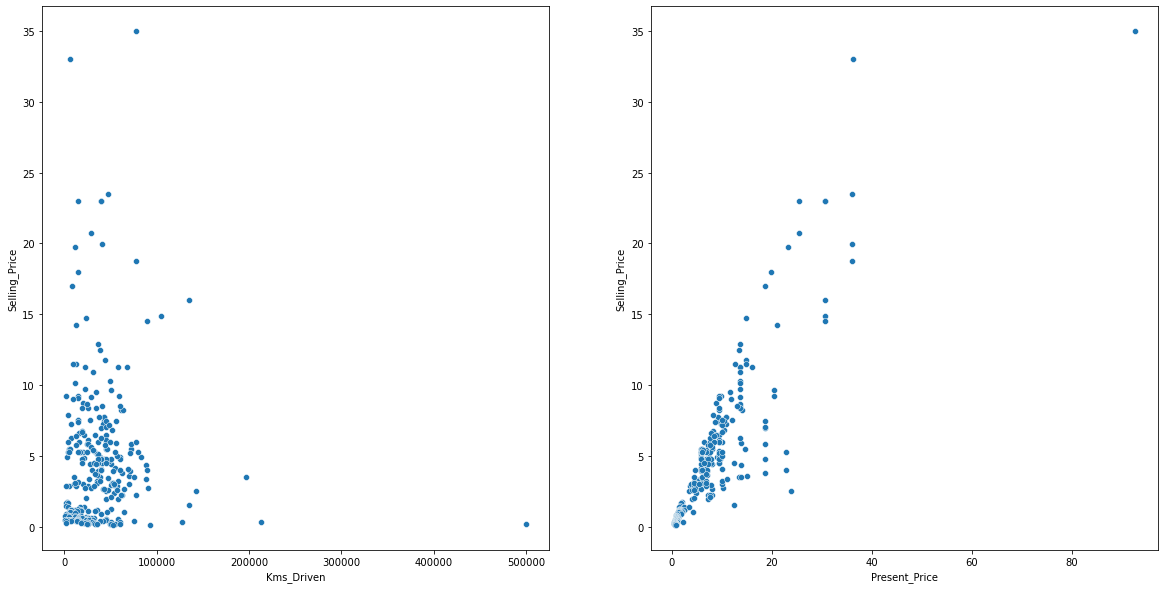

In [10]:
fig, axes = plt.subplots(1, 2,figsize=(20,10))

sns.scatterplot(x=df['Kms_Driven'], y=df['Selling_Price'], ax=axes[0])
sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'], ax=axes[1])


<AxesSubplot:xlabel='Owner', ylabel='Count'>

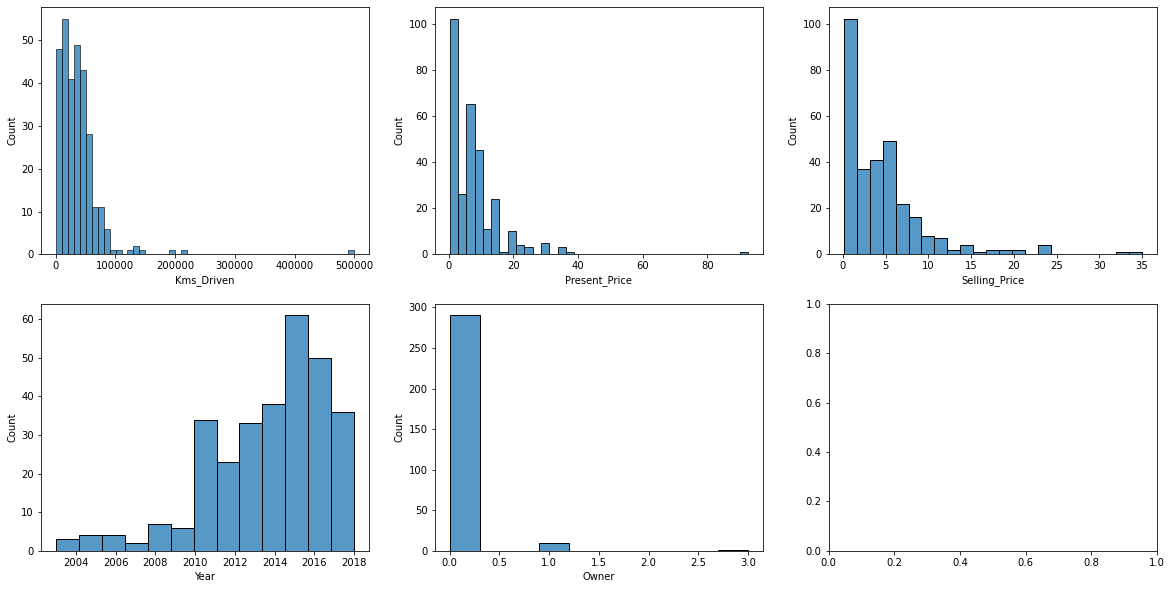

In [11]:
fig, axes = plt.subplots(2, 3,figsize=(20,10))

sns.histplot(x=df['Kms_Driven'], ax=axes[0,0])
sns.histplot(x=df['Present_Price'], ax=axes[0,1])
sns.histplot(x=df['Selling_Price'], ax=axes[0,2])
sns.histplot(x=df['Year'], ax=axes[1,0])
sns.histplot(x=df['Owner'], ax=axes[1,1])

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

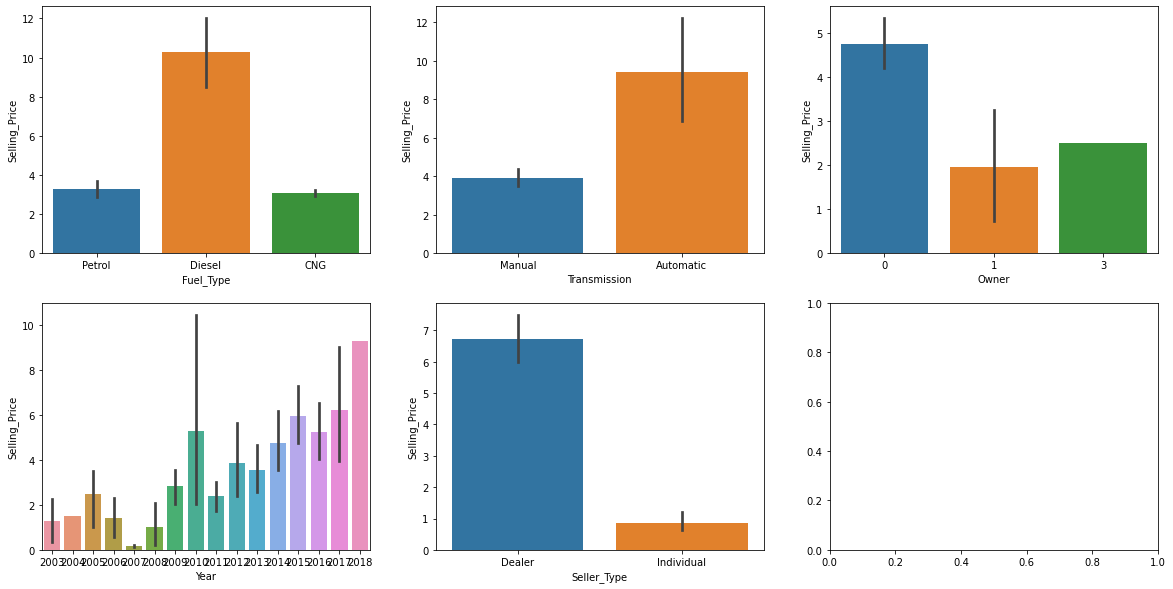

In [12]:
fig, axes = plt.subplots(2, 3,figsize=(20,10))

sns.barplot(x=df['Fuel_Type'], y=df['Selling_Price'], ax=axes[0,0])
sns.barplot(x=df['Transmission'], y=df['Selling_Price'], ax=axes[0,1])
sns.barplot(x=df['Owner'], y=df['Selling_Price'], ax=axes[0,2])
sns.barplot(x=df['Year'], y=df['Selling_Price'], ax=axes[1,0])
sns.barplot(x=df['Seller_Type'], y=df['Selling_Price'], ax=axes[1,1])

# Removing the outliers

In [13]:
iso = IsolationForest(random_state=0, contamination=0.1)

iso.fit(df[['Kms_Driven', 'Present_Price', 'Selling_Price']])
indeces = iso.predict(df[['Kms_Driven', 'Present_Price', 'Selling_Price']])

df = df[indeces == 1]
df.head()

c:\Users\elnur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Checking Data again

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       271 non-null    object 
 1   Year           271 non-null    int64  
 2   Selling_Price  271 non-null    float64
 3   Present_Price  271 non-null    float64
 4   Kms_Driven     271 non-null    int64  
 5   Fuel_Type      271 non-null    object 
 6   Seller_Type    271 non-null    object 
 7   Transmission   271 non-null    object 
 8   Owner          271 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [15]:
df.corr()['Selling_Price']

Year             0.290931
Selling_Price    1.000000
Present_Price    0.877756
Kms_Driven       0.160922
Owner           -0.112566
Name: Selling_Price, dtype: float64

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

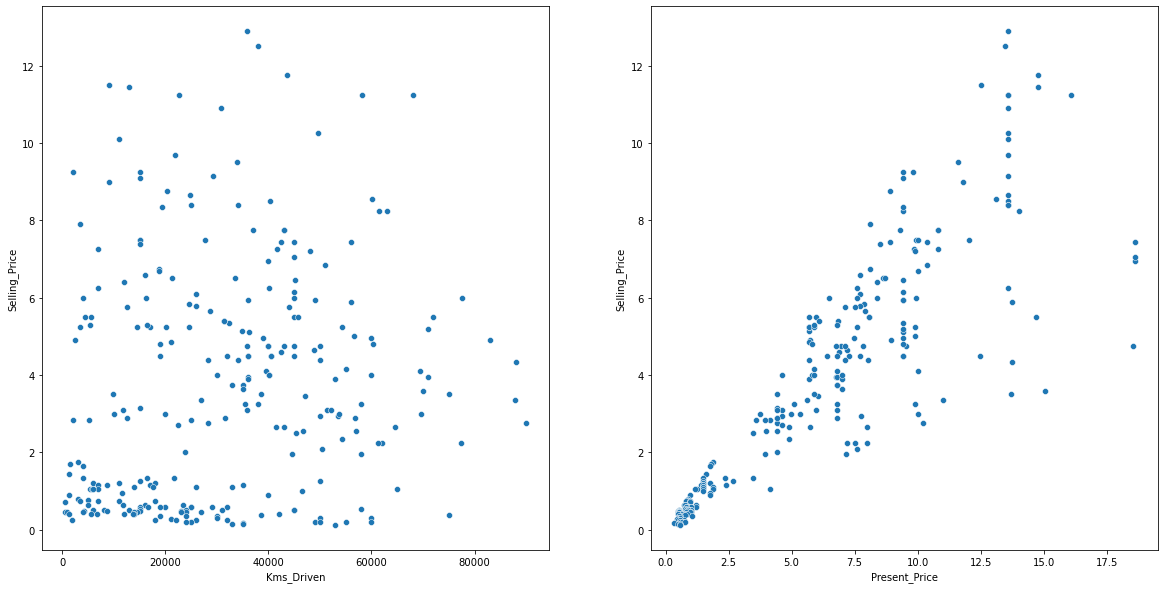

In [16]:
fig, axes = plt.subplots(1, 2,figsize=(20,10))

sns.scatterplot(x=df['Kms_Driven'], y=df['Selling_Price'], ax=axes[0])
sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'], ax=axes[1])

<AxesSubplot:xlabel='Owner', ylabel='Count'>

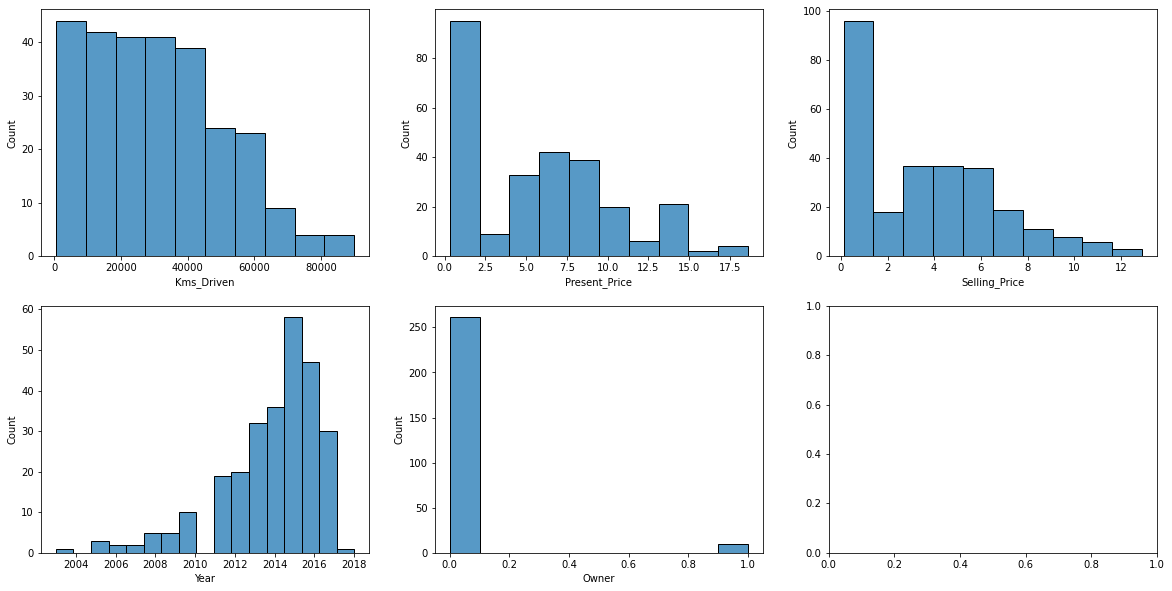

In [17]:
fig, axes = plt.subplots(2, 3,figsize=(20,10))

sns.histplot(x=df['Kms_Driven'], ax=axes[0,0])
sns.histplot(x=df['Present_Price'], ax=axes[0,1])
sns.histplot(x=df['Selling_Price'], ax=axes[0,2])
sns.histplot(x=df['Year'], ax=axes[1,0])
sns.histplot(x=df['Owner'], ax=axes[1,1])

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

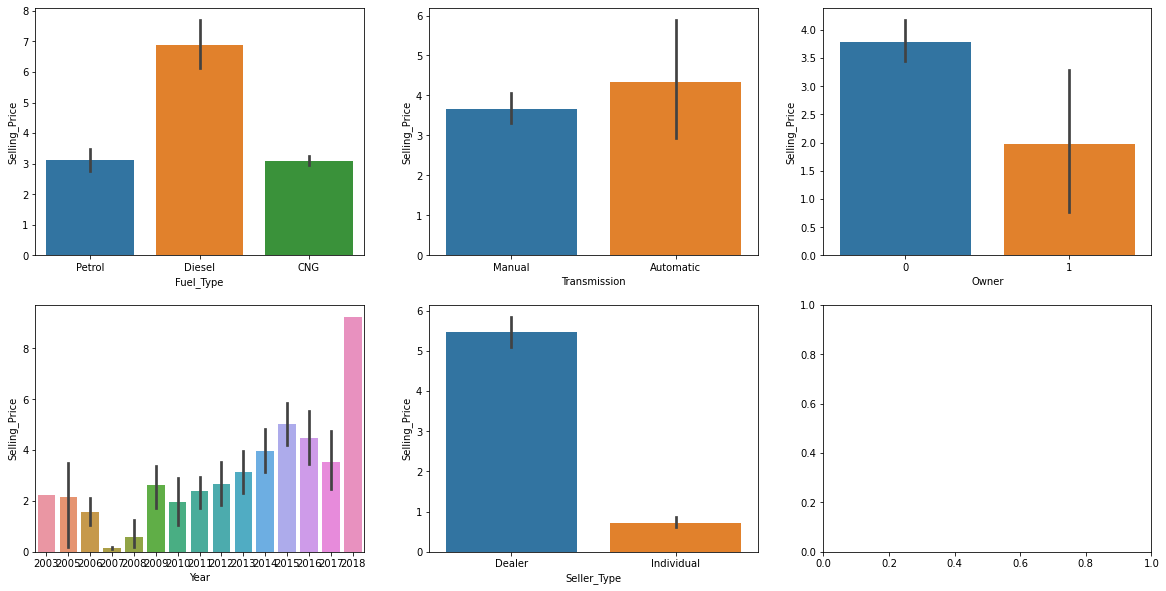

In [18]:
fig, axes = plt.subplots(2, 3,figsize=(20,10))

sns.barplot(x=df['Fuel_Type'], y=df['Selling_Price'], ax=axes[0,0])
sns.barplot(x=df['Transmission'], y=df['Selling_Price'], ax=axes[0,1])
sns.barplot(x=df['Owner'], y=df['Selling_Price'], ax=axes[0,2])
sns.barplot(x=df['Year'], y=df['Selling_Price'], ax=axes[1,0])
sns.barplot(x=df['Seller_Type'], y=df['Selling_Price'], ax=axes[1,1])

## Encoding

In [19]:
df_categorical = pd.get_dummies(df[['Fuel_Type','Transmission', 'Seller_Type']])
df_categorical.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual
0,0,0,1,0,1,1,0
1,0,1,0,0,1,1,0
2,0,0,1,0,1,1,0
3,0,0,1,0,1,1,0
4,0,1,0,0,1,1,0


In [20]:
df = pd.concat([df, df_categorical],axis=1)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0


In [21]:
df.drop(['Transmission', 'Seller_Type', 'Fuel_Type'], axis=1, inplace=True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual
0,ritz,2014,3.35,5.59,27000,0,0,0,1,0,1,1,0
1,sx4,2013,4.75,9.54,43000,0,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,0,1,1,0
4,swift,2014,4.60,6.87,42450,0,0,1,0,0,1,1,0


## Train-Test split

In [22]:
x = df.drop(['Selling_Price','Car_Name'], axis=1)
y = df['Selling_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Model training and prediction

In [23]:
rfg = RandomForestRegressor(random_state=0)

rfg.fit(x_train, y_train)
y_pred = rfg.predict(x_test)

## Testing the results

<AxesSubplot:xlabel='Selling_Price'>

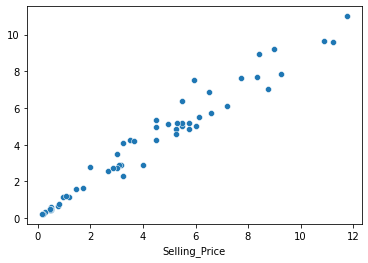

In [24]:
sns.scatterplot(x=y_test, y=y_pred)

In [25]:
r2_score(y_test, y_pred)

0.9530780808973368